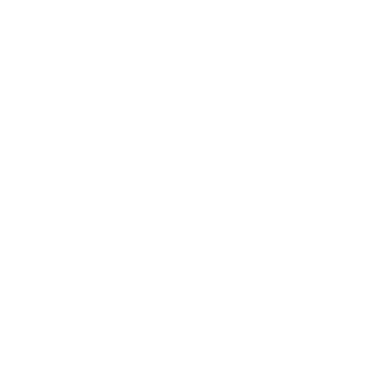

In [21]:
import sys
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib.animation as animation

# Pendulum rod lengths (m), bob masses (kg).
L1, L2 = 1, 1
m1, m2 = 1, 1
# The gravitational acceleration (m.s-2).
g = 9.81

def deriv(y, t, L1, L2, m1, m2):
    """Return the first derivatives of y = theta1, z1, theta2, z2."""
    theta1, z1, theta2, z2 = y

    c, s = np.cos(theta1-theta2), np.sin(theta1-theta2)

    theta1dot = z1
    z1dot = (m2*g*np.sin(theta2)*c - m2*s*(L1*z1**2*c + L2*z2**2) -
             (m1+m2)*g*np.sin(theta1)) / L1 / (m1 + m2*s**2)
    theta2dot = z2
    z2dot = ((m1+m2)*(L1*z1**2*s - g*np.sin(theta2) + g*np.sin(theta1)*c) + 
             m2*L2*z2**2*s*c) / L2 / (m1 + m2*s**2)
    return theta1dot, z1dot, theta2dot, z2dot


# Maximum time, time point spacings and the time grid (all in s).
tmax, dt = 30, 0.01
t = np.arange(0, tmax+dt, dt)

# Initial conditions: theta1, dtheta1/dt, theta2, dtheta2/dt.
y0 = np.array([3*np.pi/7, 0, 3*np.pi/4, 0])

# Do the numerical integration of the equations of motion
y = odeint(deriv, y0, t, args=(L1, L2, m1, m2))

# Unpack z and theta as a function of time
theta1, theta2 = y[:,0], y[:,2]

# Convert to Cartesian coordinates of the two bob positions.
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)
x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)

# Plotted bob circle radius
r = 0.05
# Plot a trail of the m2 bob's position for the last trail_secs seconds.
trail_secs = 1
# This corresponds to max_trail time points.
max_trail = int(trail_secs / dt)


def animate(i):
# def make_plot(i):
    # Plot and save an image of the double pendulum configuration for time
    # point i.
    # The pendulum rods.
    ax.plot([0, x1[i], x2[i]], [0, y1[i], y2[i]], lw=2, c='k')
    # Circles representing the anchor point of rod 1, and bobs 1 and 2.
    c0 = Circle((0, 0), r/2, fc='k', zorder=10)
    c1 = Circle((x1[i], y1[i]), r, fc='b', ec='b', zorder=10)
    c2 = Circle((x2[i], y2[i]), r, fc='r', ec='r', zorder=10)
    ax.add_patch(c0)
    ax.add_patch(c1)
    ax.add_patch(c2)

    # The trail will be divided into ns segments and plotted as a fading line.
    ns = 20
    s = max_trail // ns
    for j in range(ns):
        imin = i - (ns-j)*s
        if imin < 0:
            continue
        imax = imin + s + 1
        # The fading looks better if we square the fractional length along the
        # trail.
        alpha = (j/ns)**2
        ax.plot(x2[imin:imax], y2[imin:imax], c='r', solid_capstyle='butt',
                lw=2, alpha=alpha)

    # Centre the image on the fixed anchor point, and ensure the axes are equal
    ax.set_xlim(-L1-L2-r, L1+L2+r)
    ax.set_ylim(-L1-L2-r, L1+L2+r)
    ax.set_aspect('equal', adjustable='box')
    ax.axis('off')
#     plt.axis('off')
    return ax,
#     plt.savefig('frames/_img{:04d}.png'.format(i//di), dpi=72)
#     plt.cla()


# Make an image every di time points, corresponding to a frame rate of fps
# frames per second.
# Frame rate, s-1
fps = 10
di = int(1/fps/dt)
fig = plt.figure(figsize=(8.3333, 6.25), dpi=72)
ax = fig.add_subplot(111)

ani = animation.FuncAnimation(fig, animate, range(1, len(y)),
                              interval=dt*1000, blit=True)

for i in range(0, t.size, di):
    make_plot(i)
    

In [22]:
ani.save('test.gif', writer='pillow', fps=1 / dt)

In [1]:
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

In [2]:
G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 2.0  # length of pendulum 1 in m
L2 = 2.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg

In [3]:
def derivs(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    delta = state[2] - state[0]
    den1 = (M1+M2) * L1 - M2 * L1 * cos(delta) * cos(delta)
    dydx[1] = ((M2 * L1 * state[1] * state[1] * sin(delta) * cos(delta)
                + M2 * G * sin(state[2]) * cos(delta)
                + M2 * L2 * state[3] * state[3] * sin(delta)
                - (M1+M2) * G * sin(state[0]))
               / den1)

    dydx[2] = state[3]

    den2 = (L2/L1) * den1
    dydx[3] = ((- M2 * L2 * state[3] * state[3] * sin(delta) * cos(delta)
                + (M1+M2) * G * sin(state[0]) * cos(delta)
                - (M1+M2) * L1 * state[1] * state[1] * sin(delta)
                - (M1+M2) * G * sin(state[2]))
               / den2)

    return dydx

In [4]:
# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.03
t = np.arange(0, 30, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

In [5]:
# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

In [6]:
x1 = L1*sin(y[:, 0])
y1 = -L1*cos(y[:, 0])

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1

(-4.0, 4.0, -4.0, 4.0)

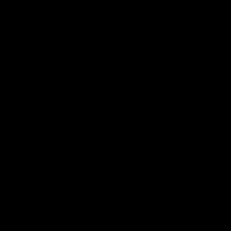

In [7]:
fig = plt.figure()
fig.patch.set_facecolor('black')
ax = fig.add_subplot(111, autoscale_on=True, xlim=(-4, 4), ylim=(-4, 4))
ax.set_aspect('equal')
ax.axis('off')

In [8]:
# fig, ax = plt.subplots(1,1, figsize=(4,4))
# ax.set_facecolor('black')
# ax.get_xaxis().set_ticks([])
# ax.get_yaxis().set_ticks([])

In [9]:
# line, = ax.plot([], [], 'o-', lw=2)
line, = ax.plot([], [], lw=2)
line2, = ax.plot([], [], color='cyan', lw=2)
# ax.set_ylim(-8, 8)
# ax.set_xlim(-8, 8)


# def init():
# #     line.set_data([], [])
#     line, = ax.plot([], [], 'o-', lw=2)
#     line2, = ax.plot([], [], 'o-', markersize = 5, alpha=0.05, color='cyan')
#     return line, line2, 


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [1, y1[i]+1, y2[i]+1]
#     print(i)
    line.set_data(thisx, thisy)
    line2.set_data(x2[:i+1], y2[:i+1]+1)
#     line2.set_data(x2[i:i+10], y2[i:i+10]+1)
    return line, line2,
#     return line2,


ani = animation.FuncAnimation(fig, animate, range(1, len(y)),
                              interval=dt*1000, blit=True)#, init_func=init)

In [10]:
ani.save('test.gif', writer='pillow', fps=1 / dt)

In [11]:
1/dt

33.333333333333336

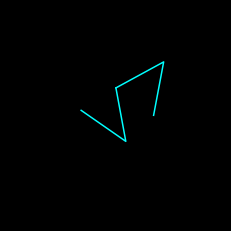

In [38]:
fig = plt.figure()
fig.patch.set_facecolor('black')
ax = fig.add_subplot(111, autoscale_on=True, xlim=(-4, 4), ylim=(-4, 4))
ax.set_aspect('equal')
ax.axis('off')

thisx = [0, x1[2], x2[2]]
thisy = [1, y1[2]+1, y2[2]+1]
ax.plot(thisx, thisy, color='cyan')
thisx = [0, x1[200], x2[200]]
thisy = [1, y1[200]+1, y2[200]+1]
ax.plot(thisx, thisy, color='cyan')
# ax.plot(x2[:], y2[:]+1, color='cyan') 
# ax.scatter(x2[:], y2[:]+1, c=y2[:], cmap='twilight')